In [32]:
import pandas as pd 
import numpy as np
import os 
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
path = r"C:\Users\ryani\Desktop\JupyterLab\NY_Citibike_2022"

In [34]:
df = pd.read_pickle(os.path.join(path, '02_Prepared_Data', 'merged.pkl'))
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9


In [35]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'Precipitation', 'avgtemp'],
      dtype='object')

# Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function

In [36]:
df_day_full = df[['ride_id', 'date', 'Precipitation', 'avgtemp']]
df_day_full.head()

,ride_id,date,Precipitation,avgtemp
0,BFD29218AB271154,2022-01-21,0.0,-6.0
1,7C953F2FD7BE1302,2022-01-10,0.0,1.6
2,95893ABD40CED4B8,2022-01-26,0.0,-2.3
3,F853B50772137378,2022-01-03,0.0,1.4
4,7590ADF834797B4B,2022-01-22,0.0,-5.9


In [37]:
df_day_nodup = df_day_full.drop_duplicates(subset=['date'])
df_day_nodup.shape

(365, 4)

In [38]:
df_day_nodup = (df_day_nodup.set_index('date').sort_index(ascending=True))

<Axes: xlabel='date'>

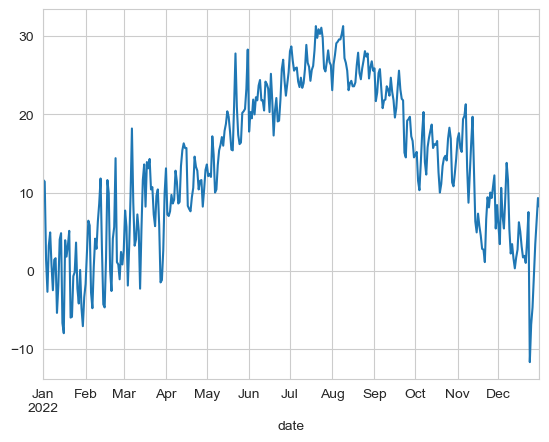

In [39]:
df_day_nodup['avgtemp'].plot()

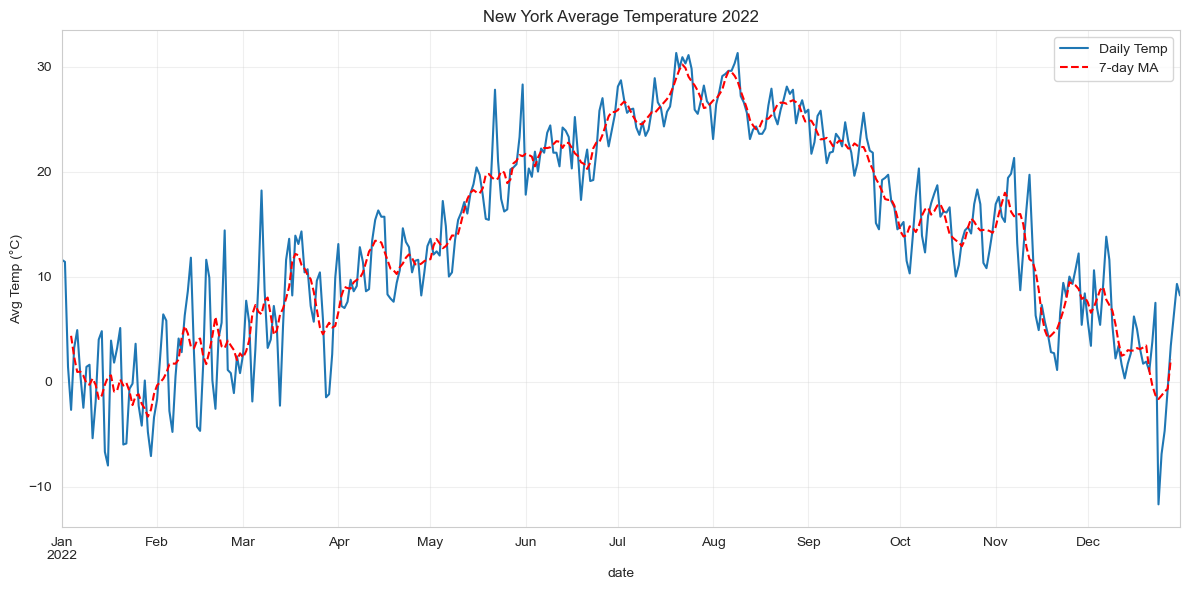

In [40]:
fig_temp, ax = plt.subplots(figsize=(12, 6))

# Plot the raw series on that ax
df_day_nodup['avgtemp'].plot(ax=ax, color='tab:blue', label='Daily Temp')

# Labeling and titling via ax
ax.set_xlabel('Date')
ax.set_ylabel('Avg Temp (°C)')
ax.set_title('New York Average Temperature 2022')

# 4) Add grid
ax.grid(alpha=0.3)

# Overlay 7-day rolling mean
df_day_nodup['avgtemp'] \
    .rolling(7, center=True) \
    .mean() \
    .plot(ax=ax, color='red', linestyle='--', label='7-day MA')

# Add legend, tighten layout, and show
ax.legend()
plt.tight_layout()
plt.show()


In [41]:
# Export
fig_temp.savefig(os.path.join(path, '04_Visualisations', 'fig_temp.png'), dpi=300, bbox_inches='tight')

# Create a column with the count of trips per day and merge it with the weather dataframe

In [42]:
df['trips_per_day'] = (df.groupby('date')['ride_id'].transform('count'))
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969


# Create a line chart of bike trip counts and temperatures plotted on a dual axis

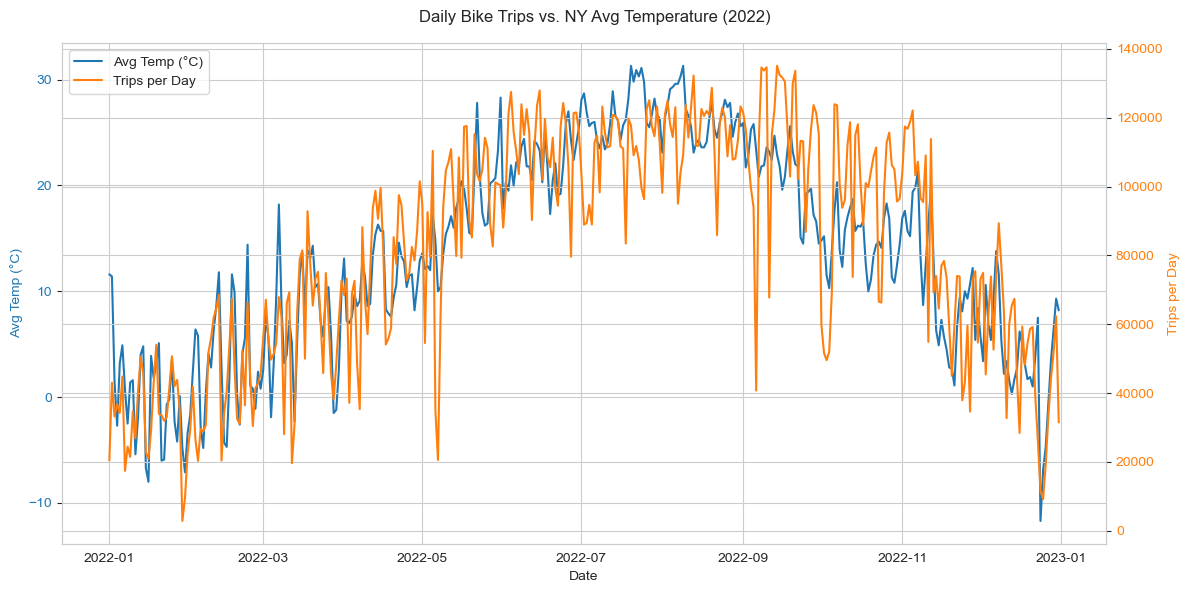

In [43]:
df_day = (df.groupby('date', as_index=True).agg(trips_per_day=('ride_id', 'count'),avgtemp=('avgtemp', 'mean')))

# Plot on dual axes
fig_dual_trips_temp, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: average temperature
ax1.plot(df_day.index, df_day['avgtemp'],color='tab:blue', linewidth=1.5, label='Avg Temp (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Temp (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right axis: trip counts
ax2 = ax1.twinx()
ax2.plot(df_day.index, df_day['trips_per_day'],color='tab:orange', linewidth=1.5, label='Trips per Day')
ax2.set_ylabel('Trips per Day', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title, layout, and legend
fig_dual_trips_temp.suptitle('Daily Bike Trips vs. NY Avg Temperature (2022)')
fig_dual_trips_temp.tight_layout()
# combine legends from both axes
lines, labels = ax1.get_lines() + ax2.get_lines(), \
                [l.get_label() for l in ax1.get_lines() + ax2.get_lines()]
ax1.legend(lines, labels, loc='upper left')

plt.show()


# In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

In [44]:
df_day.head()

,trips_per_day,avgtemp
date,,
2022-01-01,20428,11.6
2022-01-02,43009,11.4
2022-01-03,33189,1.4
2022-01-04,36842,-2.7
2022-01-05,34230,3.2


## I used Matplotlib’s object-oriented API. First I made a new df with unique days and avgtemp. This simplifies things a little for me. I then made the figure specifying subplots were to be made. First data to plot was the x axis date (index) and the 1st y-axis avg temps. I then did the second y axis of count of trips with the same x-axis. The axis then need to be combined. Changes were made to make it look more appealing. 

In [45]:
# Export
fig_dual_trips_temp.savefig(os.path.join(path, '04_Visualisations', 'fig_dual_trips_temp.png'), dpi=300, bbox_inches='tight')

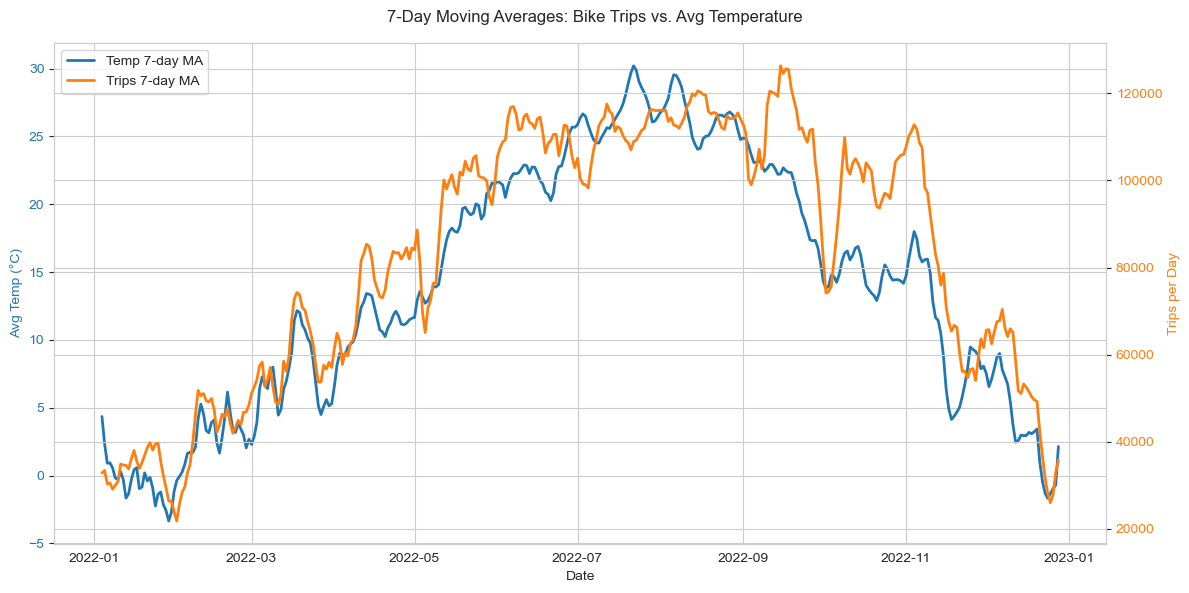

In [46]:
# Compute 7‐day moving averages (centered)
df_day['trips_ma7'] = df_day['trips_per_day'].rolling(window=7, center=True).mean()
df_day['temp_ma7']  = df_day['avgtemp'].rolling(window=7, center=True).mean()

# Plot only the 7-day moving averages on dual axes
fig_dual_7day, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: temperature MA
ax1.plot(
    df_day.index,
    df_day['temp_ma7'],
    color='tab:blue',
    linewidth=2,
    label='Temp 7-day MA'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Temp (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right axis: trips MA
ax2 = ax1.twinx()
ax2.plot(
    df_day.index,
    df_day['trips_ma7'],
    color='tab:orange',
    linewidth=2,
    label='Trips 7-day MA'
)
ax2.set_ylabel('Trips per Day', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 5. Legend and layout
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig_dual_7day.suptitle('7-Day Moving Averages: Bike Trips vs. Avg Temperature')
fig_dual_7day.tight_layout()
plt.show()


In [47]:
# Export
fig_dual_7day.savefig(os.path.join(path, '04_Visualisations', 'fig_dual_7day.png'), dpi=300, bbox_inches='tight')

In [48]:
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598,528.071
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727,649.260
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005,832.131
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189,2102.228
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234.431


## tripduration measured in seconds

In [49]:
df['tripduration(mins)'] = (df['tripduration'] / 60)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins)
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598,528.071,8.801183
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727,649.260,10.821000
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005,832.131,13.868850
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189,2102.228,35.037133
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234.431,20.573850


In [50]:
df['tripduration']           = df['tripduration'].round().astype('int64')
df['tripduration(mins)']     = df['tripduration(mins)'].round().astype('int64')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins)
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598,528,9
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727,649,11
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005,832,14
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189,2102,35
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234,21


C:\Users\ryani\AppData\Local\Temp\ipykernel_35716\2786784701.py:35: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ryani\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


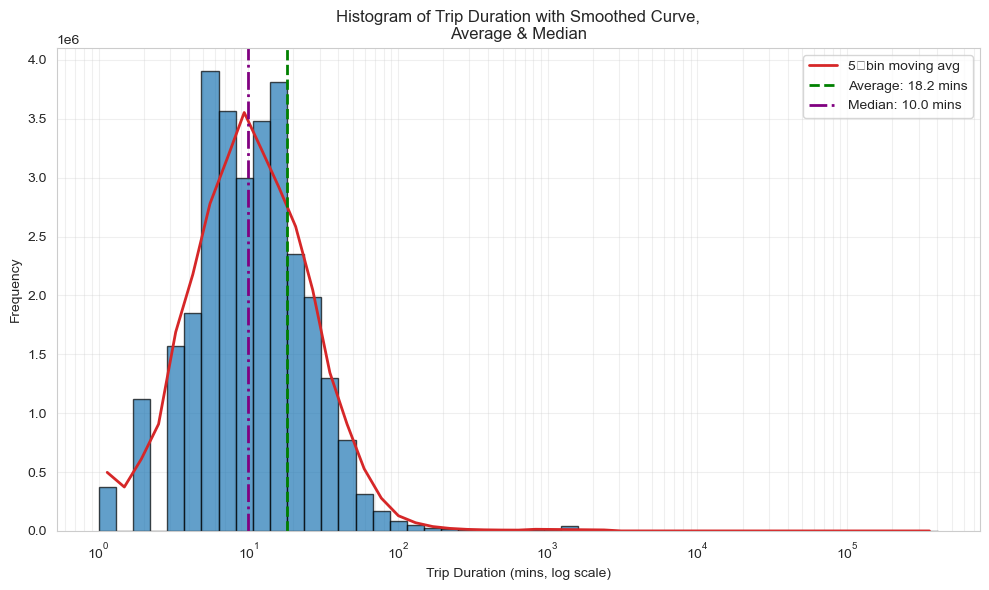

In [51]:
# Extract trip durations in minutes and keep only positives
td = df['tripduration(mins)']
td = td[td > 0]

# Compute average and median
avg_td    = td.mean()
median_td = td.median()

# Define log‐spaced bins
bins = np.logspace(np.log10(td.min()), np.log10(td.max()), 50)

# Plot histogram on log scale and grab counts
fig_trip_dur_hist, ax = plt.subplots(figsize=(10, 6))

counts, bins, _ = plt.hist(td,bins=bins,color='tab:blue', alpha=0.7,edgecolor='black')
plt.xscale('log')

# Compute geometric midpoints and smooth with a moving average
midpoints = np.sqrt(bins[:-1] * bins[1:])
smoothed = pd.Series(counts).rolling(window=5, center=True, min_periods=1).mean()

# Overlay the smoothed curve
plt.plot(midpoints,smoothed,color='tab:red',linewidth=2,label='5‐bin moving avg')

# Mark average and median with vertical lines & labels
plt.axvline(avg_td,color='green',linestyle='--',linewidth=2,label=f'Average: {avg_td:.1f} mins')
plt.axvline(median_td, color='purple',linestyle='-.',linewidth=2,label=f'Median: {median_td:.1f} mins')

# Final styling
plt.xlabel('Trip Duration (mins, log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration with Smoothed Curve,\nAverage & Median')
plt.legend()
plt.grid(which='both', alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
# Export
fig_trip_dur_hist.savefig(os.path.join(path, '04_Visualisations', 'fig_trip_dur_hist.png'), dpi=300, bbox_inches='tight')

C:\Users\ryani\AppData\Local\Temp\ipykernel_35716\3417723272.py:2: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig_trip_dur_hist.savefig(os.path.join(path, '04_Visualisations', 'fig_trip_dur_hist.png'), dpi=300, bbox_inches='tight')


In [53]:
# Combine membership status and bike type into one column
df['usertype'] = df['member_casual'] + '_' + df['rideable_type']

#  make it a categorical dtype for efficiency
df['usertype'] = df['usertype'].astype('category')

# Inspect the four profiles
print(df['usertype'].unique())
# -> ['member_classic_bike', 'casual_electric_bike', 'member_electric_bike', 'casual_classic_bike']

['member_electric_bike', 'member_classic_bike', 'casual_classic_bike', 'casual_electric_bike']
Categories (4, object): ['casual_classic_bike', 'casual_electric_bike', 'member_classic_bike', 'member_electric_bike']


In [54]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,Precipitation,avgtemp,trips_per_day,tripduration,tripduration(mins),usertype
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-6.0,33598,528,9,member_electric_bike
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,1.6,34727,649,11,member_classic_bike
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-2.3,42005,832,14,member_electric_bike
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,1.4,33189,2102,35,member_classic_bike
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-5.9,31969,1234,21,member_classic_bike


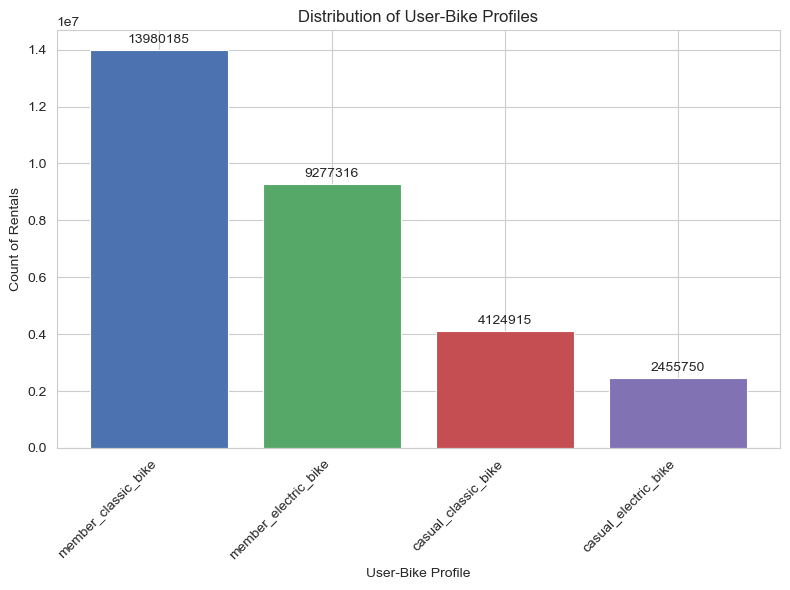

In [55]:
# Apply a whitegrid background via seaborn
sns.set_style("whitegrid")

# Define the four profiles in a fixed order
order = ['member_classic_bike', 'member_electric_bike', 'casual_classic_bike','casual_electric_bike']
profile_counts = df['usertype'].value_counts().reindex(order)

# Choose a custom palette
palette = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']

# Create figure and axis
fig_profile_hist, ax = plt.subplots(figsize=(8, 6))

# Explicit x‐positions for each bar
positions = np.arange(len(order))

# 6. Plot the bars
bars = ax.bar(positions, profile_counts.values, color=palette, edgecolor='white', linewidth=0.8)

# Annotate each bar with its count
max_count = profile_counts.max()
for pos, count in zip(positions, profile_counts.values):
    ax.text(pos, count + max_count * 0.01,
        f'{int(count)}', ha='center', va='bottom')

# Set fixed ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(order, rotation=45, ha='right')

# Labels and title
ax.set_xlabel('User-Bike Profile')
ax.set_ylabel('Count of Rentals')
ax.set_title('Distribution of User-Bike Profiles')

plt.tight_layout()
plt.show()


In [56]:
# Export
fig_profile_hist.savefig(os.path.join(path, '04_Visualisations', 'fig_profile_hist.png'), dpi=300, bbox_inches='tight')

## Bonus task stipulates a Gender but this was not in my downloaded data

In [57]:
#Export df
df.to_pickle(os.path.join(path, '02_Prepared_Data', 'merged_profile.pkl'))